In [95]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [166]:
f = np.load('../data.npz')
x = f['feature']
y = f['propensity']

In [167]:
print(x.shape, y.shape)

(10, 1000, 12) (10, 1000)


In [168]:
x = x.reshape(-1, 12)
y = y.flatten()

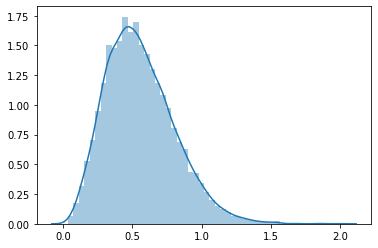

In [169]:
sns.distplot(y)

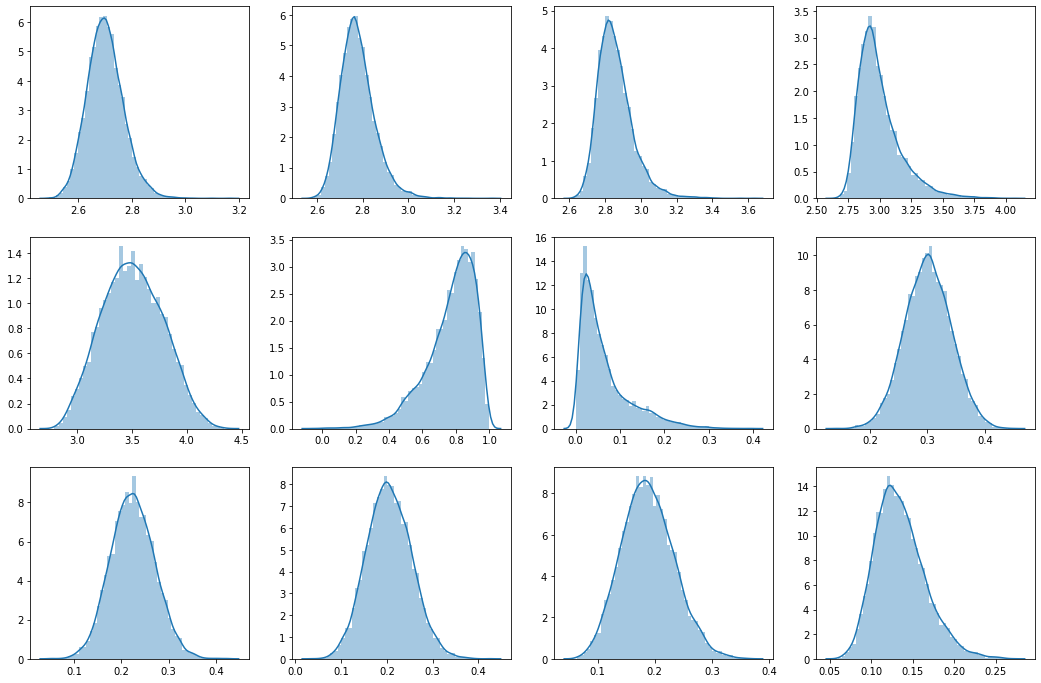

In [170]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
idx = 0
for i in range(3):
    for j in range(4):
        sns.distplot(x[:,idx], ax=ax[i,j])
        idx += 1

In [171]:
scaler = StandardScaler()
data = np.concatenate((x, y.reshape(-1,1)), axis=1)
scaler.fit(data)
data_norm = scaler.transform(data)
x_norm = data_norm[:,:-1]
y_norm = data_norm[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=.2)

In [164]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor()
regr.fit(x_train, y_train)
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

(0.1264640613040131, 6.993001954693164e-30)
(0.04749711033686023, 0.03366962947364831)


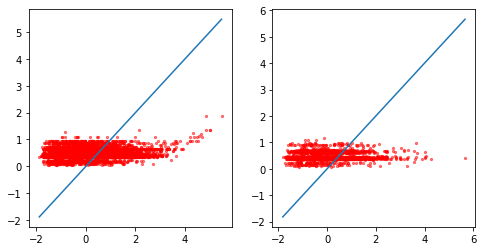

In [165]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

xx = np.linspace(np.min(y_train), np.max(y_train), 1000)
ax[0].plot(xx, xx)
ax[0].scatter(y_train, y_train_pred, s=5, alpha=.5, c='red')

xx = np.linspace(np.min(y_test), np.max(y_test), 1000)
ax[1].plot(xx, xx)
ax[1].scatter(y_test, y_test_pred, s=5, alpha=.5, c='red')

print(scipy.stats.pearsonr(y_train, y_train_pred))
print(scipy.stats.pearsonr(y_test, y_test_pred))

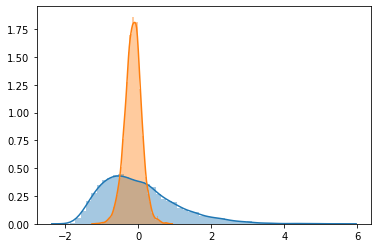

In [162]:
sns.distplot(y_train)
sns.distplot(y_train_pred)